# Practical 5

In [17]:
import sys
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import xarray as xr
import itertools

import utils

### Linear trend of Berlin temperature:

**Create Random Data (for illustration):**

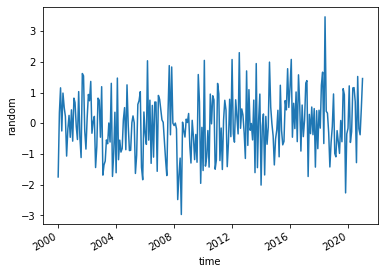

In [3]:
np.random.seed(100)
data = xr.DataArray(
    np.random.normal(size=253),
    coords={"time": pd.date_range("2000-01-01", "2021-01-01", freq="MS")},
    dims = ('time'),
    name="random",
)
data.plot();

In [4]:
data

<xarray.DataArray 'random' (time: 253)>
array([-1.74976547e+00,  3.42680403e-01,  1.15303580e+00, -2.52436037e-01,
        9.81320787e-01,  5.14218841e-01,  2.21179669e-01, -1.07004333e+00,
       -1.89495831e-01,  2.55001444e-01, -4.58026986e-01,  4.35163488e-01,
       -5.83595050e-01,  8.16847072e-01,  6.72720806e-01, -1.04411143e-01,
       -5.31280377e-01,  1.02973269e+00, -4.38135623e-01, -1.11831825e+00,
        1.61898166e+00,  1.54160517e+00, -2.51879139e-01, -8.42435738e-01,
        1.84518691e-01,  9.37082201e-01,  7.31000344e-01,  1.36155613e+00,
       -3.26238059e-01,  5.56760149e-02,  2.22399609e-01, -1.44321700e+00,
       -7.56352306e-01,  8.16454011e-01,  7.50444762e-01, -4.55946927e-01,
        1.18962227e+00, -1.69061683e+00, -1.35639905e+00, -1.23243451e+00,
       -5.44439162e-01, -6.68171737e-01,  7.31456323e-03, -6.12938735e-01,
        1.29974807e+00, -1.73309562e+00, -9.83310099e-01,  3.57507753e-01,
       -1.61357850e+00,  1.47071387e+00, -1.18801760e+00, -5.49746194e-01,
       -9.40046162e-01, -8.27932364e-01,  1.08863468e-01,  5.07809590e-01,
       -8.62227347e-01,  1.24946974e+00, -7.96112459e-02, -8.89731481e-01,
       -8.81798389e-01,  1.86389495e-02,  2.37844622e-01,  1.35485486e-02,
       -1.63552940e+00, -1.04420988e+00,  6.13038882e-01,  7.36205213e-01,
        1.02692144e+00, -1.43219061e+00, -1.84118830e+00,  3.66093226e-01,
       -3.31777135e-01, -6.89217978e-01,  2.03460756e+00, -5.50714412e-01,
        7.50453330e-01, -1.30699234e+00,  5.80573336e-01, -1.10452309e+00,
...
        5.22997805e-01, -1.63454028e-02, -4.15816336e-01, -1.35850294e+00,
       -5.14429891e-01, -2.16060120e-01,  4.22380220e-01, -1.09404293e+00,
        1.23690789e+00, -2.30284678e-01, -7.04418200e-01, -5.91375121e-01,
        7.36995169e-01,  4.35867253e-01,  1.77599359e+00,  5.13074379e-01,
        1.17052698e+00,  2.07771223e+00, -4.55922019e-01,  6.49172927e-01,
       -1.74781554e-01,  1.01726434e+00, -5.99983045e-01,  1.57616672e+00,
        6.04423539e-01, -9.07030417e-01,  5.92023269e-01, -4.37064416e-01,
        1.01775773e-01,  1.30834683e+00,  1.38760181e+00, -1.73539115e+00,
        2.88377420e-01, -3.39085433e-01,  5.27369133e-01, -3.74302884e-01,
        4.77092297e-01, -1.42976266e+00,  4.07706525e-01, -8.28280393e-01,
        4.23457282e-01, -1.59517365e-01,  1.24108209e+00,  1.66353631e+00,
       -6.61937715e-01,  3.46522715e+00,  3.91438619e-01,  3.27245353e-01,
       -3.11347061e-01, -1.42465559e+00, -6.24872185e-01, -1.09995396e-01,
        9.52959428e-01, -9.83362644e-01, -1.09455719e+00, -2.41348750e-01,
       -5.95113839e-01, -9.82811895e-01,  8.82299344e-02, -6.02759370e-01,
        1.12555545e+00,  9.27053299e-01, -2.26915699e+00, -3.48170638e-01,
       -1.64025403e-01,  1.21658059e+00, -6.26853905e-01, -2.74939808e-01,
        1.14745744e+00,  1.15996897e+00,  7.02184505e-01, -1.28390481e+00,
        1.52230777e+00, -1.79963318e-01, -3.76147368e-01,  4.60349211e-01,
        1.45542146e+00])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2021-01-01

**Compute the linear trend:**

In [18]:
def linear_fit(x, y):
    # y = a + b * x
    # change below...
    sum_dev = 0
    
    for (i,j) in zip(x,y):
        sum_dev += (i-x.mean())*(j-y.mean())
    
    cov_xy = sum_dev/len(x)
        
    b = cov_xy/x.std()**2
    a = y.mean()-b*x.mean()

    
    #a, b = (-0.6209002570015287, 4.410123759038496e-19)
    return a, b

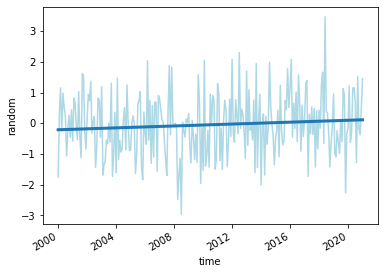

In [19]:
DECADE_IN_NS = 10 * 365.25 * 24 * 3600 * 1e9

# compute slope in K / nanoseconds and offset in K
x = data.time.values.astype("float")  # need float type for fit
y = data.values
a, b = linear_fit(x, y)

# convert K / ns to K / decade
# k_per_decade = ???

# plot
data.plot(c="lightblue", zorder=0)
plt.plot(
    x.astype("datetime64[ns]"),  # need datetime type for plot
    a + b * x,
    lw=3,
)

plt.show()

**Work with NAO:**

In [7]:
nao = utils.get_nao()

In [8]:
# change time resolution to monthly! (aggregate daily values in one month and compute mean)
nao_monthly = nao.resample(time="MS").mean()  # MS: resample to start of each month

# merging with join=inner ensures that both datasets have same time coordinate
merged = xr.merge([data, nao_monthly], join="inner")
merged

<xarray.Dataset>
Dimensions:  (time: 253)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2021-01-01
Data variables:
    random   (time) float64 -1.75 0.3427 1.153 -0.2524 ... -0.3761 0.4603 1.455
    NAO      (time) float64 0.2843 1.095 0.4387 ... 1.273 -0.1481 -0.6686